In [1]:
import numpy as num
import matplotlib.pyplot as plot
import networkx as nx

In [2]:
class AVLNode():
    
    def __init__(self, key, value):
        
        self.key = key
        self.value = value
        self.lc = None
        self.rc = None
        self.parent = None
        self.bf = 0

In [32]:
class AVL():
    
    def __init__(self):
        self.root = None
        self.unbalanced = []
        
    def search(self, key):
        return self.search_helper(self.root, key)
    
    def search_helper(self, current_node, key):
        if current_node is None:
            raise Exception("awkward...key not found.")
            
        elif current_node == key:
            return current_node.val
        
        elif current_node > key:
            return self.search_helper(current_node.lc, key)
        
        else:
            return self.search_helper(current_node.rc, key)
        
    def insert(self, key, value):
        self.root = self.insert_helper(self.root, key, value)
        self.bf() 
        
                # need to check if the tree is balanced or not :)
        if (len(self.unbalanced)) > 0:
            current = self.unbalanced[0]
            # checking left case
            if current.bf > 1:
                # check the children 
                if current.lc.bf > 0:
                    # left left case
                    self.lleft_rotate(current)
                elif current.lc.bf < 0:
                    # left right case
                    self.lright_rotate(current)
            # checking the right side
            elif current.bf < -1:
                if current.rc.bf < 0:
                    # right right case
                    self.rright_rotate(current)
                elif current.lc.bf > 0:
                    # right left case
                    self.rleft_rotate(current)          
            
        
    def insert_helper(self, current_node, key, value):
        if current_node is None:
            new_node = AVLNode(key, value)
            return new_node
       
        elif current_node.key == key:
            current_node.val = value
            return current_node
        # else, recursively insert into left or right subtrees, depending on current.key vs
        # input key
        elif current_node.key < key:
            new_node = self.insert_helper(current_node.rc, key, value)
            new_node.parent = current_node
            current_node.rc = new_node
            return current_node
        else:
            new_node = self.insert_helper(current_node.lc, key, value)
            new_node.parent = current_node
            current_node.lc = new_node
            return current_node 

    # left left rotate
    def lleft_rotate(self, current_node):
        child = current_node.lc
        grandc = child.lc
        
        if current_node is not self.root:
            current_node.parent.lc = child
            child.parent = current_node.parent
        
        else:
            self.root = child
            child.parent = None
            
        if child.rc is not None:
                old_right = child.rc
                child.rc = current_node
                current_node.parent = child
                current_node.lc = old_right
                old_right.parent = current_node    
                
        else:
            child.rc = current_node
            current_node.parent = child
            current_node.lc = None
        
    # left right rotate
    def lright_rotate(self, current_node):
        child = current_node.lc
        grandc = child.rc
        old_left = grandc.lc
        
        current_node.lc = grandc
        grandc.parent = current_node
        grandc.lc = child
        child.parent = grandc
        child.rc = old_left        
        old_left.parent = child
        
        if current_node is not self.root:
            current_node.parent.lc = grandc
            grandc.parent = current_node.parent
            current_node.parent = grandc
            current_node.lc = None
            grandc.rc = current_node
                        
        else:
            self.root = grandc
            grandc.parent = None
            grandc.rc = current_node
            current_node.lc = None
            current_node.parent = grandc
            
    
    # right right rotate
    def rright_rotate(self, current_node):
        child = current_node.rc
        grandc = child.rc
        
        if current_node is not self.root:
            current_node.parent.rc = child
            child.parent = current_node.parent
        
        else:
            self.root = child
            child.parent = None
            
        if child.lc is not None:
                old_right = child.lc
                child.lc = current_node
                current_node.parent = child
                current_node.rc = old_right
                old_right.parent = current_node    
                
        else:
            child.lc = current_node
            current_node.parent = child
            current_node.rc = None
    
    # right left rotate
    def rleft_rotate(self, current_node):
        child = current_node.lc
        grandc = child.lc
        
        if current_node is not self.root:
            current_node.parent.lc = child
            child.parent = current_node.parent
        
        else:
            self.root = child
            child.parent = None
            
        if child.lc is not None:
                old_right = child.rc
                child.rc = current_node
                current_node.parent = child
                current_node.lc = old_right
                old_right.parent = current_node    
                
        else:
            child.rc = current_node
            current_node.parent = child
            current_node.lc = None
    
    
    def depth(self):
        return self.depth_helper(self, current_node)

    def depth_helper(self, current_node):
        if current_node is None:
            return 0
        if current_node.lc is None and current_node.rc is None:
            return 0
        
        elif current_node.lc is None:
            return 1 + self.depth_helper(current_node.rc)
        
        elif current_node.rc is None:
            return 1 + self.depth_helper(current_node.lc)
        
        else:
            return 1 + max(self.depth_helper(current_node.lc), self.depth_helper(current_node.rc))
    
    def bf(self):
        self.bf_helper(self.root)
        
    # need to calculate the balancing factor
    def bf_helper(self, node):
        if node == None:
            pass
        
        else:
            self.bf_helper(node.lc)
            self.bf_helper(node.rc)
            if node.lc is not None and node.rc is None:
                node.bf = 1 + self.depth_helper(node.lc)
            
            elif node.lc is None and node.rc is not None:
                node.bf = -1 - self.depth_helper(node.rc)
            
            else:
                node.bf = self.depth_helper(node.lc) - self.depth_helper(node.rc)
                
            if node.bf > 1 or node.bf < -1:
                self.unbalanced.append(node)
    
    def as_nx_graph(self):
        graph = nx.DiGraph()
        self.add_to_graph(graph, self.root)
        return graph
    
    def add_to_graph(self, graph, current_node):
        if current_node.lc is not None:
            graph.add_edge(current_node.key, current_node.lc.key)
            self.add_to_graph(graph, current_node.lc)
        if current_node.rc is not None:
            graph.add_edge(current_node.key, current_node.rc.key)
            self.add_to_graph(graph, current_node.rc)

In [33]:
tree = AVL()
tree.insert(10, "cat")
tree.insert(6, "dog")
tree.insert(15, "snake")
tree.insert(2, "bunny")
tree.insert(8, "frog")
tree.insert(7, "horse")

In [34]:
tree.root.key

8

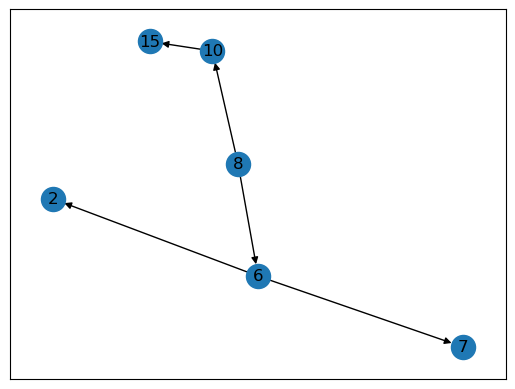

In [35]:
gr = tree.as_nx_graph()
nx.draw_networkx(gr, with_labels=True)

In [40]:
import random
randomList = random.sample(range(-50, 50), 10)
print(randomList)

[23, 14, -34, 18, 38, -13, 32, 11, -43, -38]


In [41]:
randomTree = AVL()
for item in randomList:
    randomTree.insert(item, "cat")

In [42]:
randomTree.root.key

14

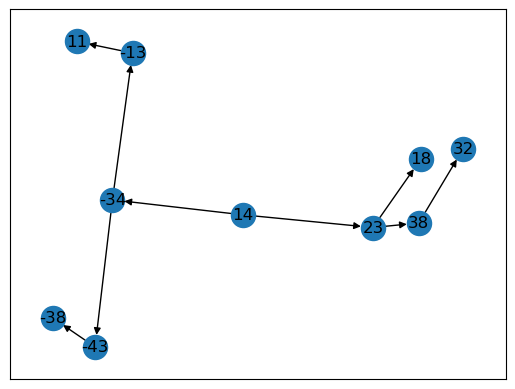

In [43]:
gr = randomTree.as_nx_graph()
nx.draw_networkx(gr, with_labels=True)